<a href="https://colab.research.google.com/github/JuhiNayak/Machine-Learning/blob/master/StanceDetection_Sprint3_JuhiNayak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fake News Challenge - Stance Detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
pd.set_option('display.max_colwidth', -1)
from sklearn import preprocessing
import seaborn as seabornInstance 
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
%matplotlib inline
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**LIAR-LIAR dataset**

Description of the TSV format:

* Column 1: the ID of the statement ([ID].json).
* Column 2: the label.
* Column 3: the statement.
* Column 4: the subject(s).
* Column 5: the speaker.
* Column 6: the speaker's job title.
* Column 7: the state info.
* Column 8: the party affiliation.
* Column 9-13: the total credit history count, including the current statement.
* Column 9: barely true counts.
* Column 10: false counts.
* Column 11: half true counts.
* Column 12: mostly true counts.
* Column 13: pants on fire counts.
* Column 14: the context (venue / location of the speech or statement).

In [ ]:
trainpath = "/content/drive/MyDrive/the-feature-finders/AlternusVera/Lier-Lier/train.tsv"
testpath = "/content/drive/MyDrive/the-feature-finders/AlternusVera/Lier-Lier/test.tsv"
validpath = "/content/drive/MyDrive/the-feature-finders/AlternusVera/Lier-Lier/valid.tsv"

colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo',
            'partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts',
            'pantsonfirecounts','context']
train_news = pd.read_csv(trainpath, sep='\t',names = colnames, error_bad_lines=False)
print(train_news.shape)

test_news = pd.read_csv(testpath, sep='\t',names = colnames, error_bad_lines=False)
print(test_news.shape)

valid_news = pd.read_csv(validpath, sep='\t',names = colnames, error_bad_lines=False)
print(valid_news.shape)

(10240, 14)
(1267, 14)
(1284, 14)


In [ ]:
train_news.head(2)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,2635.json,false,Says the Annies List political group supports third-trimester abortions on demand.,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.


In [ ]:
test_news.head(2)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,11972.json,true,Building a wall on the U.S.-Mexico border will take literally years.,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,false,Wisconsin is on pace to double the number of layoffs this year.,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference


In [ ]:
valid_news.head(2)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,12134.json,barely-true,We have less Americans working now than in the 70s.,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT use the Holy Bible, but instead the Kuran (Their equivalency to our Bible, but very different beliefs).","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN


In [ ]:
import sys
import random
import re
import argparse

from collections import defaultdict
from sklearn.ensemble import GradientBoostingClassifier
from csv import DictReader

In [ ]:
FNCtrainBodiespath = "/content/drive/MyDrive/the-feature-finders/AlternusVera/FNC/train_bodies.csv"
FNCtrainStancespath = "/content/drive/MyDrive/the-feature-finders/AlternusVera/FNC/train_stances.csv"

df_FNCtrainBodies = pd.read_csv(FNCtrainBodiespath)
df_FNCtrainStances = pd.read_csv(FNCtrainStancespath)

In [ ]:
df_FNCtrainBodies.head(3)

,Body ID,articleBody
0,0,"A small meteorite crashed into a wooded area in Nicaragua's capital of Managua overnight, the government said Sunday. Residents reported hearing a mysterious boom that left a 16-foot deep crater near the city's airport, the Associated Press reports. \n\nGovernment spokeswoman Rosario Murillo said a committee formed by the government to study the event determined it was a ""relatively small"" meteorite that ""appears to have come off an asteroid that was passing close to Earth."" House-sized asteroid 2014 RC, which measured 60 feet in diameter, skimmed the Earth this weekend, ABC News reports. \nMurillo said Nicaragua will ask international experts to help local scientists in understanding what happened.\n\nThe crater left by the meteorite had a radius of 39 feet and a depth of 16 feet, said Humberto Saballos, a volcanologist with the Nicaraguan Institute of Territorial Studies who was on the committee. He said it is still not clear if the meteorite disintegrated or was buried.\n\nHumberto Garcia, of the Astronomy Center at the National Autonomous University of Nicaragua, said the meteorite could be related to an asteroid that was forecast to pass by the planet Saturday night.\n\n""We have to study it more because it could be ice or rock,"" he said.\n\nWilfried Strauch, an adviser to the Institute of Territorial Studies, said it was ""very strange that no one reported a streak of light. We have to ask if anyone has a photo or something.""\n\nLocal residents reported hearing a loud boom Saturday night, but said they didn't see anything strange in the sky.\n\n""I was sitting on my porch and I saw nothing, then all of a sudden I heard a large blast. We thought it was a bomb because we felt an expansive wave,"" Jorge Santamaria told The Associated Press.\n\nThe site of the crater is near Managua's international airport and an air force base. Only journalists from state media were allowed to visit it."
1,4,"Last week we hinted at what was to come as Ebola fears spread across America. Today, we get confirmation. As The Daily Caller reports, one passenger at Dulles International Airport outside Washington, D.C. is apparently not taking any chances. A female passenger dressed in a hazmat suit - complete with a full body gown, mask and gloves - was spotted Wednesday waiting for a flight at the airport.\n\n \n\n\n\nSource: The Daily Caller\n\nWe particularly liked the JCPenney bag - maybe that's a new business line for the bankrupt retailer...\n\n* * *\n\nOn a side note, try Halloween stores if you need a Haz-Mat suit in a hurry..."
2,5,"(NEWSER) – Wonder how long a Quarter Pounder with cheese can last? Two Australians say they bought a few McDonald's burgers for friends back in 1995, when they were teens, and one of the friends never showed up. So the kid's burger went uneaten—and stayed that way, Australia's News Network reports. ""We’re pretty sure it’s the oldest burger in the world,"" says one of the men, Casey Dean. Holding onto the burger for their friend ""started off as a joke,"" he adds, but ""the months became years and now, 20 years later, it looks the same as it did the day we bought it, perfectly preserved in its original wrapping.""\n\nDean and his burger-buying mate, Eduard Nitz, even took the burger on Australian TV show The Project last night and ""showed off the mold-free specimen,"" News 9 reports. The pair offered to take a bite of it for charity but were dissuaded by the show's hosts. They've also started a Facebook page for the burger called ""Can This 20 Year Old Burger Get More Likes Than Kanye West?"" that has more than 4,044 likes as of this writing. And they're selling an iTunes song, ""Free the Burger,"" for $1.69, and giving proceeds to the charity Beyond Blue, which helps Australians battle anxiety and depression. (A few years ago, a man sold a 20-year-old bottle of McDonald's McJordan sauce for $10,000. Here's why Mickey D's food seemingly never decays.)"


In [ ]:
df_FNCtrainStances.head(3)

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodies' near Mexico town where 43 students disappeared after police clash,712,unrelated
1,Hundreds of Palestinians flee floods in Gaza as Israel opens dams,158,agree
2,"Christian Bale passes on role of Steve Jobs, actor reportedly felt he wasn't right for part",137,unrelated


In [ ]:
df_FNCtrainStances.shape

(49972, 3)

In [ ]:
df_FNCtrainStances.Stance.unique()

array(['unrelated', 'agree', 'disagree', 'discuss'], dtype=object)

In [ ]:
df_FNCtrainBodies.loc[df_FNCtrainBodies['Body ID'] == 712]

,Body ID,articleBody
475,712,"Danny Boyle is directing the untitled film\n\nSeth Rogen is being eyed to play Apple co-founder Steve Wozniak in Sony’s Steve Jobs biopic.\n\nDanny Boyle is directing the untitled film, based on Walter Isaacson's book and adapted by Aaron Sorkin, which is one of the most anticipated biopics in recent years.\n\nNegotiations have not yet begun, and it’s not even clear if Rogen has an official offer, but the producers — Scott Rudin, Guymon Casady and Mark Gordon — have set their sights on the talent and are in talks.\n\nOf course, this may all be for naught as Christian Bale, the actor who is to play Jobs, is still in the midst of closing his deal. Sources say that dealmaking process is in a sensitive stage.\n\nInsiders say Boyle will is flying to Los Angeles to meet with actress to play one of the female leads, an assistant to Jobs. Insiders say that Jessica Chastain is one of the actresses on the meeting list.\n\nWozniak, known as ""Woz,"" co-founded Apple with Jobs and Ronald Wayne. He first met Jobs when they worked at Atari and later was responsible for creating the early Apple computers."


In [ ]:
df_FNCtrainStances.loc[df_FNCtrainStances['Body ID'] == 712]

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodies' near Mexico town where 43 students disappeared after police clash,712,unrelated
1787,Seth Rogen to Play Apple’s Steve Wozniak,712,discuss
3974,Mexico police find mass grave near site 43 students vanished,712,unrelated
4936,Mexico Says Missing Students Not Found In First Mass Graves,712,unrelated
5210,New iOS 8 bug can delete all of your iCloud documents,712,unrelated
5863,Return of the Mac: Seth Rogen in talks to star as Apple co-founder Steve Wozniak in upcoming Steve Jobs biopic,712,discuss
6199,Seth Rogen Is Woz,712,discuss
6756,Mexico finds 4 more graves at site of suspected student massacre,712,unrelated
7526,"Are missing students in mass graves found near Iguala, Mexico?",712,unrelated
9003,Mexico prosecutor: Students not in 1st mass graves,712,unrelated


# Feature Selection

In [ ]:
from tqdm import tqdm
from sklearn import feature_extraction
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Data clean by using Natural Language Toolkit

In [ ]:
_wnl = nltk.WordNetLemmatizer()

def gen_or_load_feats(feat_fn, headlines, bodies, feature_file):
  feats = feat_fn(headlines, bodies)
  np.save(feature_file, feats)
  return np.load(feature_file)

def normalize_word(w):
    return _wnl.lemmatize(w).lower()


def get_tokenized_lemmas(s):
    return [normalize_word(t) for t in nltk.word_tokenize(s)]


def clean(s):
    # Cleans a string: Lowercasing, trimming, removing non-alphanumeric

    return " ".join(re.findall(r'\w+', s, flags=re.UNICODE)).lower()


def remove_stopwords(l):
    # Removes stopwords from a list of tokens
    return [w for w in l if w not in feature_extraction.text.ENGLISH_STOP_WORDS]

def gen_or_load_feats_lier(feat_fn, headlines, feature_file):
  feats = feat_fn(headlines)
  np.save(feature_file, feats)
  return np.load(feature_file)

## Word Overlap Feature

In [ ]:
def word_overlap_features(headlines, bodies):
    X = []
    for i, (headline, body) in tqdm(enumerate(zip(headlines, bodies))):
        clean_headline = clean(headline)
        clean_body = clean(body)
        clean_headline = get_tokenized_lemmas(clean_headline)
        clean_body = get_tokenized_lemmas(clean_body)
        features = [
            len(set(clean_headline).intersection(clean_body)) / float(len(set(clean_headline).union(clean_body)))]
        X.append(features)
        i = i+1
    return X

## Refuting feature

In [ ]:
def refuting_features(headlines, bodies):
    _refuting_words = [
        'fake',
        'fraud',
        'hoax',
        'false',
        'deny', 'denies',
        'not',
        'despite',
        'nope',
        'doubt', 'doubts',
        'bogus',
        'debunk',
        'pranks',
        'retract'
    ]
    X = []
    for i, (headline, body) in tqdm(enumerate(zip(headlines, bodies))):
        clean_headline = clean(headline)
        clean_headline = get_tokenized_lemmas(clean_headline)
        features = [1 if word in clean_headline else 0 for word in _refuting_words]
        X.append(features)
    return X

## Polarity Feature

In [ ]:
def polarity_features(headlines, bodies):
    _refuting_words = [
        'fake',
        'fraud',
        'hoax',
        'false',
        'deny', 'denies',
        'not',
        'despite',
        'nope',
        'doubt', 'doubts',
        'bogus',
        'debunk',
        'pranks',
        'retract'
    ]

    def calculate_polarity(text):
        tokens = get_tokenized_lemmas(text)
        return sum([t in _refuting_words for t in tokens]) % 2
    X = []
    for i, (headline, body) in tqdm(enumerate(zip(headlines, bodies))):
        clean_headline = clean(headline)
        clean_body = clean(body)
        features = []
        features.append(calculate_polarity(clean_headline))
        features.append(calculate_polarity(clean_body))
        X.append(features)
    return np.array(X)

## n-grams

In [ ]:
def ngrams(input, n):
    input = input.split(' ')
    output = []
    for i in range(len(input) - n + 1):
        output.append(input[i:i + n])
    return output


def chargrams(input, n):
    output = []
    for i in range(len(input) - n + 1):
        output.append(input[i:i + n])
    return output

In [ ]:
def append_chargrams(features, text_headline, text_body, size):
    grams = [' '.join(x) for x in chargrams(" ".join(remove_stopwords(text_headline.split())), size)]
    grams_hits = 0
    grams_early_hits = 0
    grams_first_hits = 0
    for gram in grams:
        if gram in text_body:
            grams_hits += 1
        if gram in text_body[:255]:
            grams_early_hits += 1
        if gram in text_body[:100]:
            grams_first_hits += 1
    features.append(grams_hits)
    features.append(grams_early_hits)
    features.append(grams_first_hits)
    return features


def append_ngrams(features, text_headline, text_body, size):
    grams = [' '.join(x) for x in ngrams(text_headline, size)]
    grams_hits = 0
    grams_early_hits = 0
    for gram in grams:
        if gram in text_body:
            grams_hits += 1
        if gram in text_body[:255]:
            grams_early_hits += 1
    features.append(grams_hits)
    features.append(grams_early_hits)
    return features

## Extended features

In [ ]:
def hand_features(headlines, bodies):

    def binary_co_occurence(headline, body):
        # Count how many times a token in the title
        # appears in the body text.
        bin_count = 0
        bin_count_early = 0
        for headline_token in clean(headline).split(" "):
            if headline_token in clean(body):
                bin_count += 1
            if headline_token in clean(body)[:255]:
                bin_count_early += 1
        return [bin_count, bin_count_early]

    def binary_co_occurence_stops(headline, body):
        # Count how many times a token in the title
        # appears in the body text. Stopwords in the title
        # are ignored.
        bin_count = 0
        bin_count_early = 0
        for headline_token in remove_stopwords(clean(headline).split(" ")):
            if headline_token in clean(body):
                bin_count += 1
                bin_count_early += 1
        return [bin_count, bin_count_early]

    def count_grams(headline, body):
        # Count how many times an n-gram of the title
        # appears in the entire body, and intro paragraph

        clean_body = clean(body)
        clean_headline = clean(headline)
        features = []
        features = append_chargrams(features, clean_headline, clean_body, 2)
        features = append_chargrams(features, clean_headline, clean_body, 8)
        features = append_chargrams(features, clean_headline, clean_body, 4)
        features = append_chargrams(features, clean_headline, clean_body, 16)
        features = append_ngrams(features, clean_headline, clean_body, 2)
        features = append_ngrams(features, clean_headline, clean_body, 3)
        features = append_ngrams(features, clean_headline, clean_body, 4)
        features = append_ngrams(features, clean_headline, clean_body, 5)
        features = append_ngrams(features, clean_headline, clean_body, 6)
        return features

    X = []
    for i, (headline, body) in tqdm(enumerate(zip(headlines, bodies))):
        X.append(binary_co_occurence(headline, body)
                 + binary_co_occurence_stops(headline, body)
                 + count_grams(headline, body))


    return X

# Read FNC dataset

In [ ]:
class DataSet():
    def __init__(self, name="train", path="/content/drive/MyDrive/the-feature-finders/AlternusVera/FNC"):
        self.path = path

        print("Reading dataset")
        bodies = name+"_bodies.csv"
        stances = name+"_stances.csv"

        self.stances = self.read(stances)
        articles = self.read(bodies)
        self.articles = dict()

        #make the body ID an integer value
        for s in self.stances:
            s['Body ID'] = int(s['Body ID'])

        #copy all bodies into a dictionary
        for article in articles:
            self.articles[int(article['Body ID'])] = article['articleBody']

        print("Total stances: " + str(len(self.stances)))
        print("Total bodies: " + str(len(self.articles)))



    def read(self,filename):
        rows = []
        with open(self.path + "/" + filename, "r", encoding='utf-8') as table:
            r = DictReader(table)

            for line in r:
                rows.append(line)
        return rows

# Generate Test split


In [ ]:
# This function ensures that the article bodies between the training set are not present in the hold-out set.
def generate_hold_out_split (dataset, training = 0.8, base_dir="/content/drive/MyDrive/the-feature-finders/AlternusVera/FNC/splits"):
    r = random.Random()
    r.seed(1489215)

    article_ids = list(dataset.articles.keys())  # get a list of article ids
    r.shuffle(article_ids)  # and shuffle that list


    training_ids = article_ids[:int(training * len(article_ids))]
    hold_out_ids = article_ids[int(training * len(article_ids)):]

    # write the split body ids out to files for future use
    with open(base_dir+ "/"+ "training_ids.txt", "w+") as f:
        f.write("\n".join([str(id) for id in training_ids]))

    with open(base_dir+ "/"+ "hold_out_ids.txt", "w+") as f:
        f.write("\n".join([str(id) for id in hold_out_ids]))

def read_ids(file,base):
    ids = []
    with open(base+"/"+file,"r") as f:
        for line in f:
           ids.append(int(line))
        return ids

# The training set is split into k folds using the kfold_split function
def kfold_split(dataset, training = 0.8, n_folds = 10, base_dir="/content/drive/MyDrive/the-feature-finders/AlternusVera/FNC/splits"):
    generate_hold_out_split(dataset,training,base_dir)

    training_ids = read_ids("training_ids.txt", base_dir)
    hold_out_ids = read_ids("hold_out_ids.txt", base_dir)

    folds = []
    for k in range(n_folds):
        folds.append(training_ids[int(k*len(training_ids)/n_folds):int((k+1)*len(training_ids)/n_folds)])

    return folds,hold_out_ids


def get_stances_for_folds(dataset,folds,hold_out):
    stances_folds = defaultdict(list)
    stances_hold_out = []
    for stance in dataset.stances:
        if stance['Body ID'] in hold_out:
            stances_hold_out.append(stance)
        else:
            fold_id = 0
            for fold in folds:
                if stance['Body ID'] in fold:
                    stances_folds[fold_id].append(stance)
                fold_id += 1

    return stances_folds,stances_hold_out

In [ ]:
#Load the training dataset and generate folds
d = DataSet()
folds,hold_out = kfold_split(d,n_folds=10)
fold_stances, hold_out_stances = get_stances_for_folds(d,folds,hold_out)

Reading dataset
Total stances: 49972
Total bodies: 1683


#Generating features for the input headline and body

In [ ]:
LABELS = ['agree', 'disagree', 'discuss', 'unrelated']
LABELS_RELATED = ['unrelated','related']
RELATED = LABELS[0:3]

def score_submission(gold_labels, test_labels):
    score = 0.0
    cm = [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]]

    for i, (g, t) in enumerate(zip(gold_labels, test_labels)):
        g_stance, t_stance = g, t
        if g_stance == t_stance:
            score += 0.25
            if g_stance != 'unrelated':
                score += 0.50
        if g_stance in RELATED and t_stance in RELATED:
            score += 0.25

        cm[LABELS.index(g_stance)][LABELS.index(t_stance)] += 1

    return score, cm


def print_confusion_matrix(cm):
    lines = []
    header = "|{:^11}|{:^11}|{:^11}|{:^11}|{:^11}|".format('', *LABELS)
    line_len = len(header)
    lines.append("-"*line_len)
    lines.append(header)
    lines.append("-"*line_len)

    hit = 0
    total = 0
    for i, row in enumerate(cm):
        hit += row[i]
        total += sum(row)
        lines.append("|{:^11}|{:^11}|{:^11}|{:^11}|{:^11}|".format(LABELS[i],
                                                                   *row))
        lines.append("-"*line_len)
    print('\n'.join(lines))


def report_score(actual,predicted):
    score,cm = score_submission(actual,predicted)
    best_score, _ = score_submission(actual,actual)

    print_confusion_matrix(cm)
    print("Score: " +str(score) + " out of " + str(best_score) + "\t("+str(score*100/best_score) + "%)")
    return score*100/best_score


In [ ]:
def generate_features(stances,dataset,name):
    h, b, y = [],[],[]
    base_path = '/content/drive/MyDrive/the-feature-finders/AlternusVera/FNC/'

    for stance in stances:
        y.append(LABELS.index(stance['Stance']))
        h.append(stance['Headline'])
        b.append(dataset.articles[stance['Body ID']])

    X_overlap = gen_or_load_feats(word_overlap_features, h, b, base_path+"features/overlap."+name+".npy")
    X_refuting = gen_or_load_feats(refuting_features, h, b, base_path+"features/refuting."+name+".npy")
    X_polarity = gen_or_load_feats(polarity_features, h, b, base_path+"features/polarity."+name+".npy")
    X_hand = gen_or_load_feats(hand_features, h, b, base_path+"features/hand."+name+".npy")

    X = np.c_[X_hand, X_polarity, X_refuting, X_overlap]
    return X,y

# FNC competition dataset

In [ ]:
# Load the competition dataset
competition_dataset = DataSet("competition_test")

Reading dataset
Total stances: 25413
Total bodies: 904


In [ ]:
FNCCompBodiespath = "/content/drive/MyDrive/the-feature-finders/AlternusVera/FNC/competition_test_bodies.csv"
FNCCompStancespath = "/content/drive/MyDrive/the-feature-finders/AlternusVera/FNC/competition_test_stances.csv"

df_FNCCompBodies = pd.read_csv(FNCCompBodiespath)
df_FNCCompStances = pd.read_csv(FNCCompStancespath)

In [ ]:
df_FNCCompBodies.shape

(904, 2)

In [ ]:
df_FNCCompStances.shape

(25413, 3)

In [ ]:
df_FNCCompBodies.head(5)

Body ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [ ]:
df_FNCCompStances

,Headline,Body ID,Stance
0,Ferguson riots: Pregnant woman loses eye after cops fire BEAN BAG round through car window,2008,unrelated
1,Crazy Conservatives Are Sure a Gitmo Detainee Killed James Foley,1550,unrelated
2,A Russian Guy Says His Justin Bieber Ringtone Saved Him From A Bear Attack,2,unrelated
3,"Zombie Cat: Buried Kitty Believed Dead, Meows Back to Life",1793,unrelated
4,Argentina's President Adopts Boy to End Werewolf Curse,37,unrelated
...,...,...,...
25408,The success of the Affordable Care Act is a hugely inconvenient truth for its opponents,2582,agree
25409,The success of the Affordable Care Act is a hugely inconvenient truth for its opponents,2583,discuss
25410,The success of the Affordable Care Act is a hugely inconvenient truth for its opponents,2584,disagree
25411,The success of the Affordable Care Act is a hugely inconvenient truth for its opponents,2585,disagree


# Plot

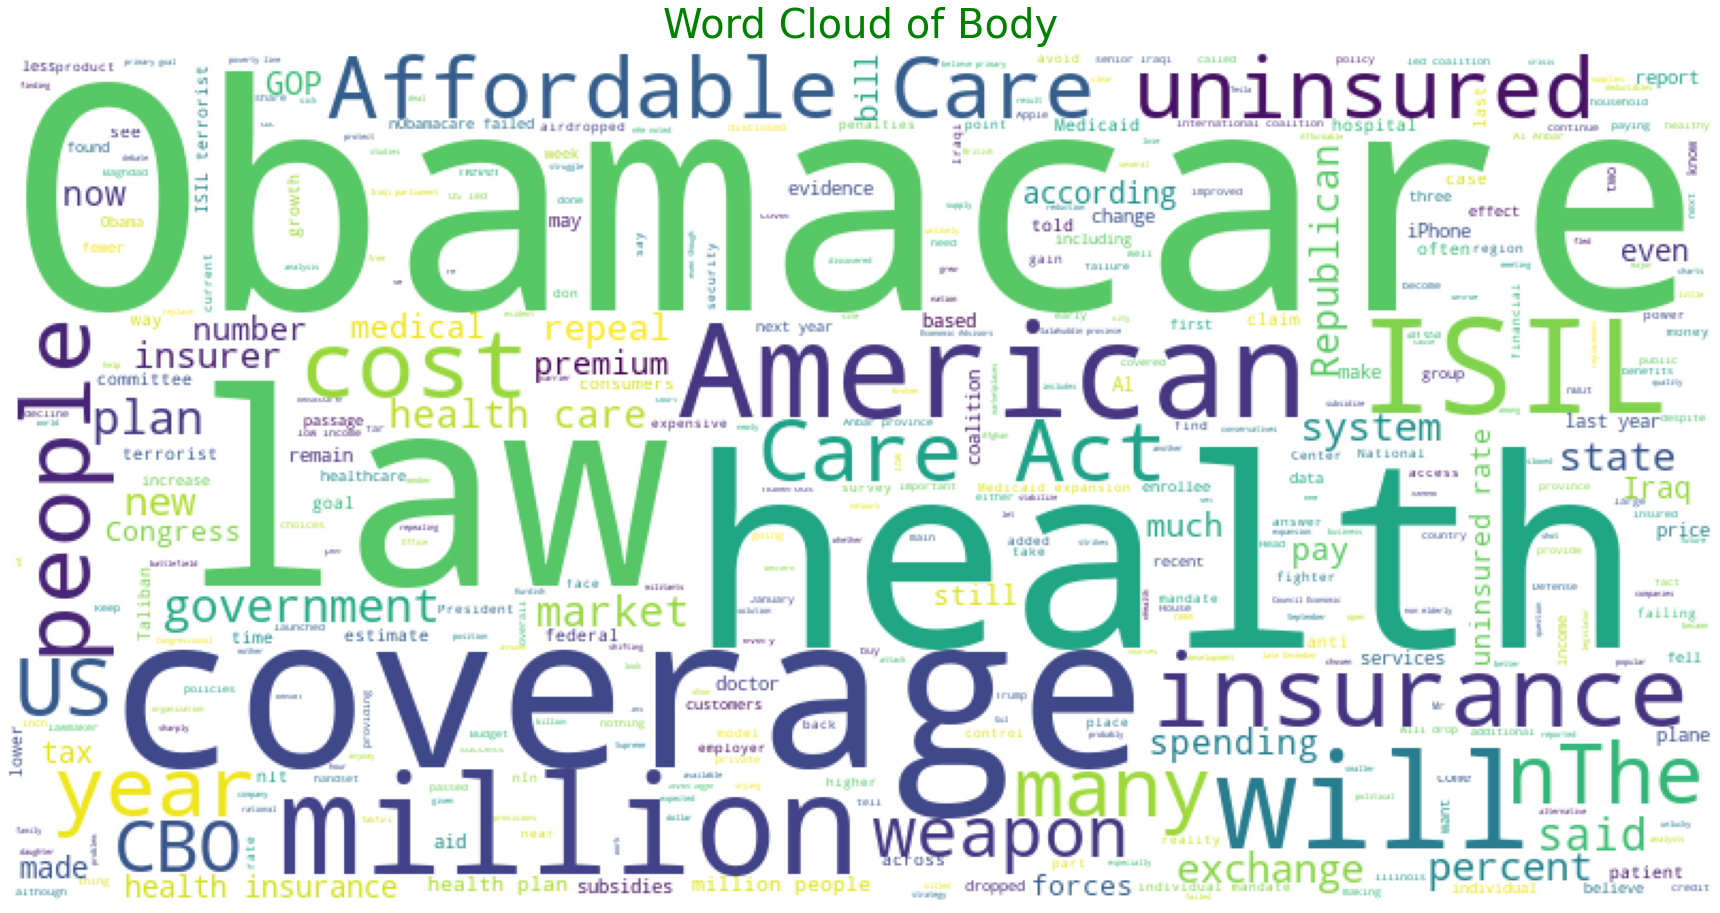

In [ ]:
import requests
import PIL
from PIL import Image
from io import BytesIO
from wordcloud import WordCloud, STOPWORDS  #install $ pip install wordcloud

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400
                    #,mask = mask
                         )
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

#response = requests.get('http://?')
#upvote_mask = np.array(Image.open(BytesIO(response.content)))#https://imgurl
plot_wordcloud(df_FNCCompBodies["articleBody"], max_words=300000, max_font_size=300, title="Word Cloud of Body")

The representation of word cloud for the competion test dataset gave me an idea about the words highest used in the body and the headline.

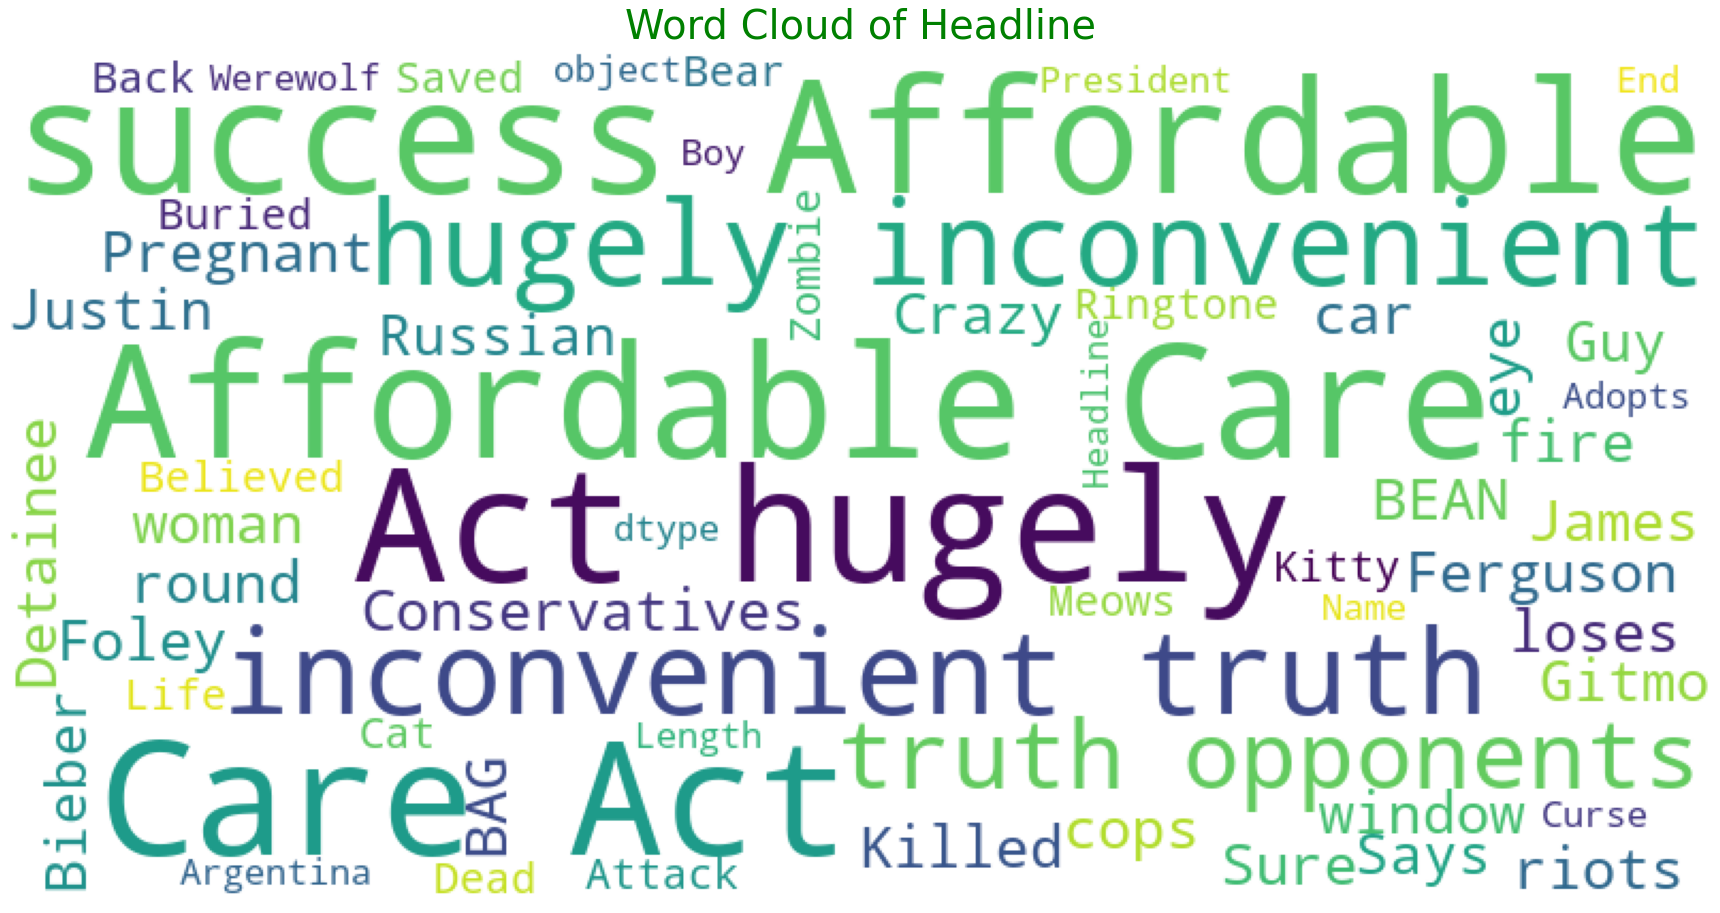

In [ ]:
plot_wordcloud(df_FNCCompStances["Headline"], max_words=300000, max_font_size=300, title="Word Cloud of Headline")

# Hold-out set of data

In [ ]:
X_competition, y_competition = generate_features(competition_dataset.stances, competition_dataset, "competition")

Xs = dict()
ys = dict()

# Load/Precompute all features now
X_holdout,y_holdout = generate_features(hold_out_stances,d,"holdout")
for fold in fold_stances:
    Xs[fold],ys[fold] = generate_features(fold_stances[fold],d,str(fold))

25413it [01:40, 252.46it/s]
25413it [00:05, 4364.30it/s]
25413it [01:33, 270.41it/s]
25413it [01:36, 263.08it/s]
9622it [00:35, 271.66it/s]
9622it [00:02, 4803.31it/s]
9622it [00:36, 260.96it/s]
9622it [00:40, 239.05it/s]
4124it [00:15, 261.13it/s]
4124it [00:00, 4881.68it/s]
4124it [00:15, 262.71it/s]
4124it [00:16, 251.64it/s]
4663it [00:17, 262.22it/s]
4663it [00:00, 5024.27it/s]
4663it [00:18, 257.92it/s]
4663it [00:19, 238.59it/s]
3783it [00:12, 297.12it/s]
3783it [00:00, 4771.90it/s]
3783it [00:12, 296.28it/s]
3783it [00:13, 282.13it/s]
3388it [00:13, 260.18it/s]
3388it [00:00, 4996.19it/s]
3388it [00:13, 253.44it/s]
3388it [00:14, 238.28it/s]
3644it [00:14, 259.70it/s]
3644it [00:00, 4943.21it/s]
3644it [00:14, 259.01it/s]
3644it [00:15, 227.98it/s]
4644it [00:20, 224.33it/s]
4644it [00:00, 4799.98it/s]
4644it [00:19, 241.24it/s]
4644it [00:20, 232.19it/s]
3848it [00:17, 215.26it/s]
3848it [00:00, 4555.78it/s]
3848it [00:15, 240.90it/s]
3848it [00:16, 235.40it/s]
4273it [00:15, 

# Gradient Boosting Classifier

In [ ]:
best_score = 0
best_fold = None

# Classifier for each fold
for fold in fold_stances:
    ids = list(range(len(folds)))
    del ids[fold]

    X_train = np.vstack(tuple([Xs[i] for i in ids]))
    y_train = np.hstack(tuple([ys[i] for i in ids]))

    X_test = Xs[fold]
    y_test = ys[fold]

    clf = GradientBoostingClassifier(n_estimators=200, random_state=14128, verbose=False)
    clf.fit(X_train, y_train)

    predicted = [LABELS[int(a)] for a in clf.predict(X_test)]
    actual = [LABELS[int(a)] for a in y_test]

    fold_score, _ = score_submission(actual, predicted)
    max_fold_score, _ = score_submission(actual, actual)

    score = fold_score/max_fold_score

    print("Score for fold "+ str(fold) + " was - " + str(score))
    if score > best_score:
        best_score = score
        best_fold = clf


#Run on Holdout set and report the final score on the holdout set
predicted = [LABELS[int(a)] for a in best_fold.predict(X_holdout)]
actual = [LABELS[int(a)] for a in y_holdout]

print("Scores on the dev set")
report_score(actual,predicted)
print("")
print("")

#Run on competition dataset
predicted = [LABELS[int(a)] for a in best_fold.predict(X_competition)]
actual = [LABELS[int(a)] for a in y_competition]

print("Scores on the test set")
report_score(actual,predicted)

Score for fold 6 was - 0.7700373455903476
Score for fold 0 was - 0.7966413336602108
Score for fold 7 was - 0.8056851930420026
Score for fold 5 was - 0.7652430044182621
Score for fold 2 was - 0.8163710380924687
Score for fold 8 was - 0.819936507936508
Score for fold 9 was - 0.7890036282444879
Score for fold 3 was - 0.8114964242342464
Score for fold 1 was - 0.7927084788378265
Score for fold 4 was - 0.7949635140935756
Scores on the dev set
-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
-------------------------------------------------------------
|   agree   |    115    |     8     |    557    |    82     |
-------------------------------------------------------------
| disagree  |    16     |     3     |    128    |    15     |
-------------------------------------------------------------
|  discuss  |    60     |     3     |   1530    |    207    |
-------------------------------------------------------------
|

75.0885098165433

# Linear SVM

In [ ]:
from sklearn.svm import SVC
best_score = 0
best_fold = None

# Classifier for each fold
for fold in fold_stances:
    ids = list(range(len(folds)))
    del ids[fold]

    X_train = np.vstack(tuple([Xs[i] for i in ids]))
    y_train = np.hstack(tuple([ys[i] for i in ids]))

    X_test = Xs[fold]
    y_test = ys[fold]

    clfSVM = SVC(kernel="linear", C=0.025, probability=True, random_state=14128, verbose=False)
    clfSVM.fit(X_train, y_train)

    predicted = [LABELS[int(a)] for a in clfSVM.predict(X_test)]
    actual = [LABELS[int(a)] for a in y_test]

    fold_score, _ = score_submission(actual, predicted)
    max_fold_score, _ = score_submission(actual, actual)

    score = fold_score/max_fold_score

    print("Score for fold "+ str(fold) + " was - " + str(score))
    if score > best_score:
        best_score = score
        best_fold = clfSVM


#Run on Holdout set and report the final score on the holdout set
predicted = [LABELS[int(a)] for a in best_fold.predict(X_holdout)]
actual = [LABELS[int(a)] for a in y_holdout]

print("Scores on the dev set")
report_score(actual,predicted)
print("")
print("")

#Run on competition dataset
predicted = [LABELS[int(a)] for a in best_fold.predict(X_competition)]
actual = [LABELS[int(a)] for a in y_competition]

print("Scores on the test set")
report_score(actual,predicted)

Score for fold 6 was - 0.7561045676529733
Score for fold 0 was - 0.774577102230939
Score for fold 7 was - 0.7861688587187102
Score for fold 5 was - 0.7558173784977908
Score for fold 2 was - 0.7999418435591742
Score for fold 8 was - 0.8074920634920635
Score for fold 9 was - 0.7728160759140386
Score for fold 3 was - 0.7924706517339091
Score for fold 1 was - 0.7878195278670206
Score for fold 4 was - 0.785233939047074
Scores on the dev set
-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
-------------------------------------------------------------
|   agree   |    57     |     0     |    594    |    111    |
-------------------------------------------------------------
| disagree  |     7     |     0     |    135    |    20     |
-------------------------------------------------------------
|  discuss  |    19     |     0     |   1525    |    256    |
-------------------------------------------------------------
| 

74.16586203197082

# XGBClassifier

In [ ]:
from xgboost import XGBClassifier
best_score = 0
best_fold = None

# Classifier for each fold
for fold in fold_stances:
    ids = list(range(len(folds)))
    del ids[fold]

    X_train = np.vstack(tuple([Xs[i] for i in ids]))
    y_train = np.hstack(tuple([ys[i] for i in ids]))

    X_test = Xs[fold]
    y_test = ys[fold]

    clfXGB = XGBClassifier(n_estimators=200, random_state=14128, verbose=False)
    clfXGB.fit(X_train, y_train)

    predicted = [LABELS[int(a)] for a in clfXGB.predict(X_test)]
    actual = [LABELS[int(a)] for a in y_test]

    fold_score, _ = score_submission(actual, predicted)
    max_fold_score, _ = score_submission(actual, actual)

    score = fold_score/max_fold_score

    print("Score for fold "+ str(fold) + " was - " + str(score))
    if score > best_score:
        best_score = score
        best_fold = clfXGB


#Run on Holdout set and report the final score on the holdout set
predicted = [LABELS[int(a)] for a in best_fold.predict(X_holdout)]
actual = [LABELS[int(a)] for a in y_holdout]

print("Scores on the dev set")
report_score(actual,predicted)
print("")
print("")

#Run on competition dataset
predicted = [LABELS[int(a)] for a in best_fold.predict(X_competition)]
actual = [LABELS[int(a)] for a in y_competition]

print("Scores on the test set")
report_score(actual,predicted)

Score for fold 6 was - 0.7731973570812984
Score for fold 0 was - 0.7903898014219172
Score for fold 7 was - 0.8010182435299109
Score for fold 5 was - 0.7668630338733432
Score for fold 2 was - 0.8168072113986624
Score for fold 8 was - 0.8231111111111111
Score for fold 9 was - 0.7814680435389338
Score for fold 3 was - 0.8096073404398867
Score for fold 1 was - 0.7970386925548261
Score for fold 4 was - 0.7986836457290027
Scores on the dev set
-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
-------------------------------------------------------------
|   agree   |    104    |     4     |    567    |    87     |
-------------------------------------------------------------
| disagree  |    14     |     0     |    135    |    13     |
-------------------------------------------------------------
|  discuss  |    52     |     1     |   1536    |    211    |
-------------------------------------------------------------


75.20008582770089

# Pickle and Load

In [ ]:
import pickle
writefile = open('stance-model', 'wb')
pickle.dump(best_fold, writefile)
writefile.close()

In [ ]:
readfile = open('stance-model', 'rb')
best_clf = pickle.load(readfile)

#Run on competition dataset
predicted_pickle = [LABELS[int(a)] for a in best_clf.predict(X_competition)]
actual_pickle = [LABELS[int(a)] for a in y_competition]

print("Scores on the test set")
report_score(actual_pickle,predicted_pickle)

Scores on the test set
-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
-------------------------------------------------------------
|   agree   |    130    |     5     |   1476    |    292    |
-------------------------------------------------------------
| disagree  |    36     |     3     |    415    |    243    |
-------------------------------------------------------------
|  discuss  |    164    |     4     |   3604    |    692    |
-------------------------------------------------------------
| unrelated |     6     |     0     |    344    |   17999   |
-------------------------------------------------------------
Score: 8761.75 out of 11651.25	(75.20008582770089%)


75.20008582770089

I have used Fake News Challenge Dataset to train my model for stance detection. I refered the offical repository for the baseline provided by Fake News Challenge organization (https://github.com/FakeNewsChallenge/fnc-1-baseline). I followed the steps to read the dataset, to extract some simple features, to train a cross validated model and to perform a evaluation on hold-out set of data. Hold-out set of data is nothing but the division of the dataset to train and test the model similar to train-test-split model. Used K-fold function to split the training set into k folds and get the score. Used Gradient Boosting Classifier to train the model for each fold and got the score out of the best fold.

Link to my datasets and files is: https://drive.google.com/drive/folders/1CH6nUAaLBsRKsT7SqM5g8UXFZ60JwRmt?usp=sharing

Becuase lier lier dataset only contains headline and not the body, so in order to utilize my model with the Lier Lier dataset, I will have to check on the process to get the body of the news by using cosine similarity with Fake News Dataset. 

After applying Gradient Boosting Classifier, Linear SVM, and XGBoost Classifier on the competition dataset to test the model. I got the best accuracy of 75.20 from XGBoost classifier.

I have pickled the model for future utilization. The best model is available at : https://drive.google.com/drive/folders/1WICJizP6L2c3F8pmXi1R25P8-ZBausGF?usp=sharing


My next step would be to customize this approach for our team's final dataset and generate the stance feature.